<a href="https://colab.research.google.com/github/VbsmRobotic/CNN_Architecture/blob/main/CNNArchitecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Step 1: Create a 7*7 image

 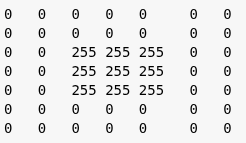


In [12]:
# Step 1: Create a 7x7 image with a white square in the center
image = np.zeros((7, 7), dtype=np.float32)
image[2:5, 2:5] = 255  # white 3x3 square

## Step 2: Define a Sobel filter


In [11]:
# Step 2: Define a Sobel filter to detect vertical edges
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

## Step 3: Convolve the image with the Sobel filter

In [14]:
# Step 3: Convolve the image with the Sobel filter
normalized_image = image / 255.0
convolved = ndimage.convolve(image, sobel_x, mode='constant', cval=0.0)


## Step 4: Display the original and convolved image

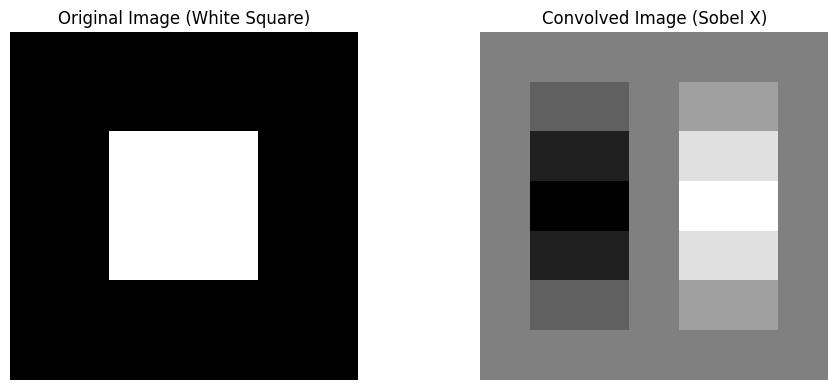

In [16]:
# Step 4: Display the original and convolved image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image (White Square)')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Convolved Image (Sobel X)')
plt.imshow(convolved, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Strong negative value: left is bright, right is dark, reverse of sobel

So convolution sees a left-to-right vertical edge

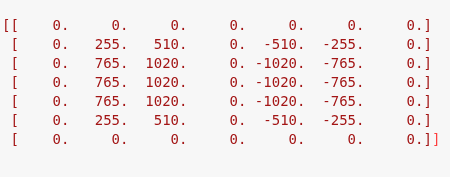


| Region Type         | Output from Filter |       Meaning        |
| ------------------- | ------------------ | -------------------- |
| Inside white square |         0          | No vertical edge     |
| At vertical edge    |       ±1020        | Strong edge detected |
| Outside square      |         0          | No contrast          |

# Step 5: Apply ReLU Activation
What is ReLU?
ReLU (Rectified Linear Unit) is an activation function defined as:

ReLU(x)=max(0,x)

So:

Positive values stay the same

Negative values become 0

It introduces non-linearity in CNNs and filters out negative activations

Convolved output (before ReLU):
 [[    0.     0.     0.     0.     0.     0.     0.]
 [    0.  -255.  -255.     0.   255.   255.     0.]
 [    0.  -765.  -765.     0.   765.   765.     0.]
 [    0. -1020. -1020.     0.  1020.  1020.     0.]
 [    0.  -765.  -765.     0.   765.   765.     0.]
 [    0.  -255.  -255.     0.   255.   255.     0.]
 [    0.     0.     0.     0.     0.     0.     0.]]

ReLU output:
 [[   0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.  255.  255.    0.]
 [   0.    0.    0.    0.  765.  765.    0.]
 [   0.    0.    0.    0. 1020. 1020.    0.]
 [   0.    0.    0.    0.  765.  765.    0.]
 [   0.    0.    0.    0.  255.  255.    0.]
 [   0.    0.    0.    0.    0.    0.    0.]]


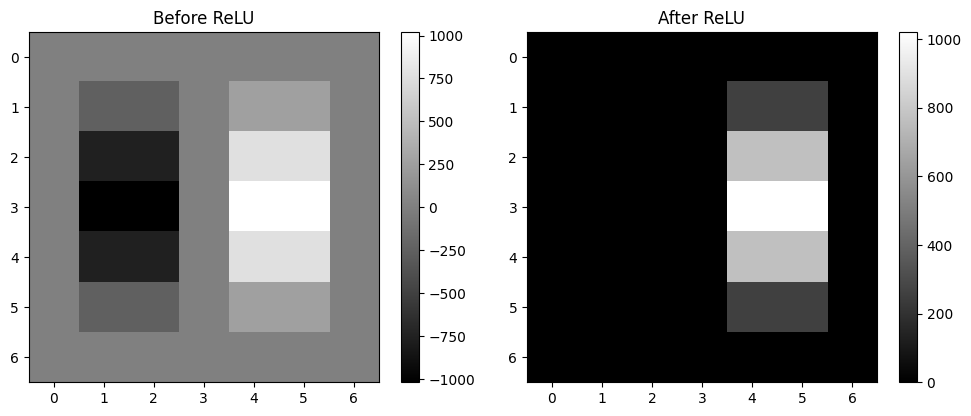

In [18]:
 #Apply ReLU
relu_output = np.maximum(0, convolved)

print("Convolved output (before ReLU):\n", np.round(convolved))
print("\nReLU output:\n", np.round(relu_output))

# 6. Visualize
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title("Before ReLU")
plt.imshow(convolved, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("After ReLU")
plt.imshow(relu_output, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()